# Machine Learning Engineer Nanodegree
## Capstone Project
## Bank Loan Prediction

### Project Overview
Our objective in this project is helping the Bank to make decisions on loans requests, accepting or rejecting the loan request based on these data which contains more than one hundred thousand rows of the above loan data.
- we will classify these data into two classes :
- **1. loan can be accepted**
- **2. loan must be rejected**

## Data Exploration & Visualization

In [1]:
# Import libraries
from IPython.display import display
from time import time
from sklearn import preprocessing
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,fbeta_score,accuracy_score
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import dataset
data = pd.read_csv('credit.csv')

# Display first records
data.head()

Using TensorFlow backend.


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Total number of records: 100514
Individuals charged off: 22639
Individuals fully paid: 77361
Percentage of Individuals charged off : 22.52323059474302%


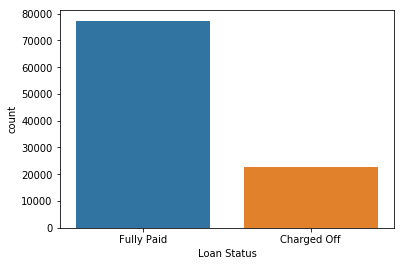

In [2]:
# Number of records
n_records = data.shape[0]

fully_paid = data[data['Loan Status'] == 'Fully Paid'].shape[0]

charged_off = data[data['Loan Status'] == 'Charged Off'].shape[0]

charged_of_percentage = charged_off * 100 / n_records
# Display statistics about target variable (Loan Status)
print("Total number of records: {}".format(n_records))
print("Individuals charged off: {}".format(charged_off))
print("Individuals fully paid: {}".format(fully_paid))
print("Percentage of Individuals charged off : {}%".format(charged_of_percentage))

# Visualize Target Variable (Loan Status)
ax = sns.countplot(data['Loan Status'])  
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

## Data Preprocessing

We have some missing values in our dataset.

In [4]:
# calculate missing values by column
def missingValues_table(df):
        # Total missing values
        missingValues = df.isnull().sum()
        
        # Percentage of missing values
        missingValues_percent = 100 * df.isnull().sum() / len(df)
        
        # Create table with results
        missingValues_table = pd.concat([missingValues, missingValues_percent], axis=1)
        
        # Rename the columns
        missingValues_table_renamed = missingValues_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        missingValues_table_renamed = missingValues_table_renamed[
        missingValues_table_renamed.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missingValues_table_renamed.shape[0]) +
              " Columns that have missing values.")
        
        # Return the dataframe with missing information
        return missingValues_table_renamed

In [5]:
missingValues_table(data)

Selected dataframe has 19 columns.
There are 19 Columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Years of Credit History,514,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5


**As we see there is 514 missing values in all variables, this means there is 514 of all null rows**

In [6]:
data[data['Loan Status'].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop these Null rows
data.drop(data.tail(514).index, inplace=True)
missingValues_table(data)

Selected dataframe has 19 columns.
There are 7 Columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


**'Months since last delinquent'** Feature has more than 50% of missing values so we should drop it

In [8]:
data = data.drop(['Months since last delinquent'], axis=1)

**'Bankruptcies' & 'Tax Liens' & 'Maximum Open Credit'** has very small percentage of missing values no problem with drop them

In [9]:
for i in data['Tax Liens'][data['Tax Liens'].isnull() == True].index:
    data.drop(labels=i, inplace=True)

In [10]:
for i in data['Bankruptcies'][data['Bankruptcies'].isnull() == True].index:
    data.drop(labels=i, inplace=True)

In [11]:
for i in data['Maximum Open Credit'][data['Maximum Open Credit'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
missingValues_table(data)

Selected dataframe has 18 columns.
There are 3 Columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


**Credit Score & Annual Income** Are continues variables, we should describe some statistics to handle thier missing values

In [12]:
pd.set_option('float_format', '{:.2f}'.format)
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,99794.00,80683.00,80683.00,99794.00,99794.00,99794.00,99794.00,99794.00,99794.00,99794.00,99794.00
mean,11757279.22,1076.28,1378339.05,18486.12,18.19,11.13,0.17,294660.16,757526.49,0.12,0.03
std,31779846.84,1475.03,1080909.86,12172.47,7.02,5.01,0.48,376066.84,8349533.15,0.35,0.26
min,15422.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,179696.00,705.00,849110.00,10228.32,13.50,8.00,0.00,112769.75,273526.00,0.00,0.00
50%,312477.00,724.00,1174371.00,16237.21,16.90,10.00,0.00,209912.00,467874.00,0.00,0.00
75%,525096.00,741.00,1650701.00,24025.22,21.70,14.00,0.00,368068.00,782826.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


 As we see, some of the **credit score** are just scaled up by 10. , we should rescale them.

In [13]:
data['Credit Score'] = data['Credit Score'].apply(lambda val: (val /10) if val>850 else val)
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,99794.00,80683.00,80683.00,99794.00,99794.00,99794.00,99794.00,99794.00,99794.00,99794.00,99794.00
mean,11757279.22,716.28,1378339.05,18486.12,18.19,11.13,0.17,294660.16,757526.49,0.12,0.03
std,31779846.84,28.30,1080909.86,12172.47,7.02,5.01,0.48,376066.84,8349533.15,0.35,0.26
min,15422.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,179696.00,703.00,849110.00,10228.32,13.50,8.00,0.00,112769.75,273526.00,0.00,0.00
50%,312477.00,722.00,1174371.00,16237.21,16.90,10.00,0.00,209912.00,467874.00,0.00,0.00
75%,525096.00,738.00,1650701.00,24025.22,21.70,14.00,0.00,368068.00,782826.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


We will use mean to handle mising values of **Credit Score** but Short/Long term is effect on Credit Score, so we will calculate Short/Long term means to assign each's mean to those have same term value

In [14]:
credit_short = data[data['Term']=='Short Term']
shortTermAvg = credit_short['Credit Score'].mean()

credit_long = data[data['Term']=='Long Term']
longTermAvg = credit_long['Credit Score'].mean()
print(shortTermAvg,longTermAvg)

724.6238081178249 695.483727170432


In [15]:
data.loc[(data.Term =='Short Term') & (data['Credit Score'].isnull()),'Credit Score'] = shortTermAvg
data.loc[(data.Term =='Long Term') & (data['Credit Score'].isnull()),'Credit Score'] = longTermAvg
missingValues_table(data)

Selected dataframe has 18 columns.
There are 2 Columns that have missing values.


,Missing Values,% of Total Values
Annual Income,19111,19.20
Years in current job,4222,4.20


Filling **Annual Income** missing values using the Median value because there is outliers in incomes

In [16]:
data['Annual Income'].fillna(data['Annual Income'].median(), inplace=True)
missingValues_table(data)

Selected dataframe has 18 columns.
There are 1 Columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.20


i will use mode value to handle **Years in current job** because its categorical variable

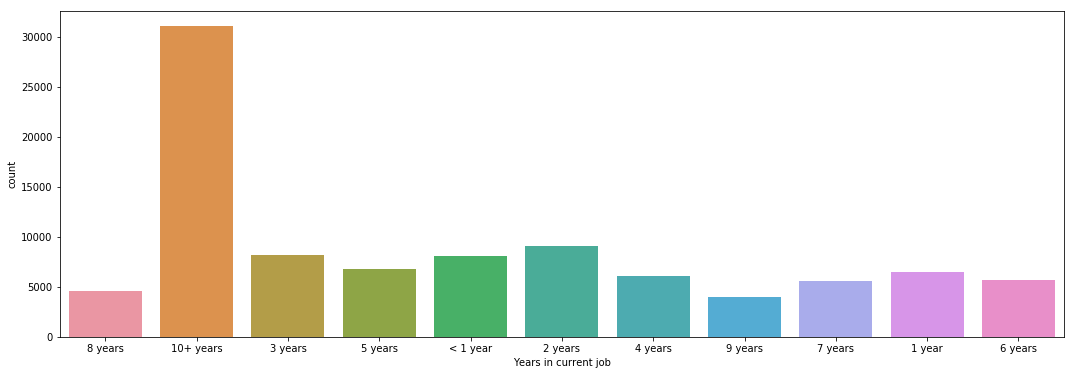

In [17]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data['Years in current job'])  
plt.show()

In [18]:
data.fillna('10+ years', inplace=True)
missingValues_table(data)

Selected dataframe has 18 columns.
There are 0 Columns that have missing values.


,Missing Values,% of Total Values


In [19]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,724.62,1174371.00,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,724.62,1174371.00,5 years,Rent,Debt Consolidation,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,0.00


Some features should dropped from our dataset
- **Loan ID & Customer ID** : these is only references with no benefits
- **Purpose & Number of Open Accounts & Current Credit Balance** : Not important in this problem we will not need any of them
- **Monthly Debt' & 'Maximum Open Credit** if we study this domain and our problem deeply, we covered these 2 features by other features in our data , **Monthly Debt** related to (Current Loan Amount, Annual Income) & **Maximum Open Credit** related to (Annual Income, Credit Score)

In [20]:
data = data.drop(['Loan ID','Customer ID','Purpose','Monthly Debt','Number of Open Accounts','Current Credit Balance',
                  'Maximum Open Credit'], axis=1)
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,17.20,1.00,1.00,0.00
1,Fully Paid,262328.00,Short Term,724.62,1174371.00,10+ years,Home Mortgage,21.10,0.00,0.00,0.00
2,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,14.90,1.00,0.00,0.00
3,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,12.00,0.00,0.00,0.00
4,Fully Paid,176220.00,Short Term,724.62,1174371.00,5 years,Rent,6.10,0.00,0.00,0.00


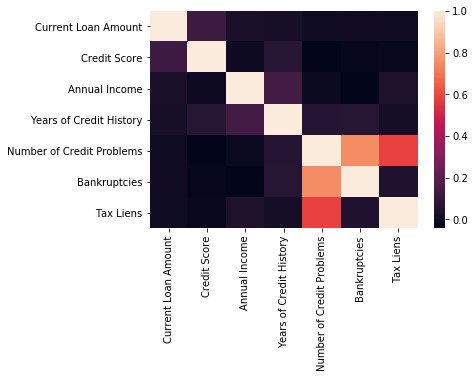

In [21]:
corr = data.corr()
sns.heatmap(corr)

## One-Hot Encoding

I will convert all continuous variables to Ordinal variables then apply One-Hot Encoding On all of them,
in my openion this technique will be better for our problem 
we dont have strong corelation between any two variables to keep it as a numirical also this will help us
to avoid overfitting.. Moreover, this technique will certainly reduce processing time and cost

**Current Loan Amount** with respect to outliers

In [22]:
meanWithoutOutliers = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
stdWithoutOutliers = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = meanWithoutOutliers - stdWithoutOutliers
highrange = meanWithoutOutliers + stdWithoutOutliers

In [23]:
data['Current Loan Amount'] =  data['Current Loan Amount'].apply(lambda x: 'Small Loan' if x<=lowrange else ('Medium Loan' if x>lowrange and x< highrange else 'Big Loan')) 

**Credit Score** Based on Experian's Credit Score Range

In [24]:
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Bad" if np.isreal(val) and val < 630 else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Fair" if np.isreal(val) and (val >= 630 and val < 690) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 690 and val < 720) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Excellent" if np.isreal(val) and (val >= 720 and val < 850) else val)

**Annual Income** with respect to outliers

In [25]:
meanWithoutOutliers = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stdWithoutOutliers = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorLine = meanWithoutOutliers -  stdWithoutOutliers
richLine = meanWithoutOutliers + stdWithoutOutliers

In [26]:
data['Annual Income'] = data['Annual Income'].apply(lambda x: "Low Income" if x<=poorLine else ("Average Income" if x>poorLine and x<richLine else "High Income"))

**Years in current job** to be **Employment History**

In [27]:
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job'] = data['Years in current job'].astype(float)

In [28]:
data['Employment History'] = data['Years in current job'].apply(lambda x: "Junior" if x<4 else ("Semi-Senior" if x>4 and x<8 else "Senior"))

In [29]:
data=data.drop(['Years in current job'],axis=1)

**Years of Credit History** to be **Credit Age**

In [30]:
data['Credit Age'] = data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>=5 and x<17 else "Exceptional Credit Age"))

In [31]:
data = data.drop(['Years of Credit History'],axis= 1)

- **Tax Liens**
- **Bankruptcies**
- **Number of Credit Problems** to be **Credit Problems**

In [32]:
data['Tax Liens'] = data['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else "Some Tax Liens")

In [33]:
data['Bankruptcies'] = data['Bankruptcies'].apply(lambda x: "No Bankruptcies" if x==0 else "Some Bankruptcies")

In [34]:
data['Credit Problems'] = data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else "Some Credit promblem")

In [35]:
data = data.drop(['Number of Credit Problems'],axis = 1)

**Loan Status**
Because we searching for 'Charged Off', thats will be our Positive class with value 1, when 'Fully Paid' will be negative class with value 0 .

In [36]:
data['Loan Status'] =  data['Loan Status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [37]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Bankruptcies,Tax Liens,Employment History,Credit Age,Credit Problems
0,0,Medium Loan,Short Term,Good,Average Income,Home Mortgage,Some Bankruptcies,No Tax Lien,Senior,Exceptional Credit Age,Some Credit promblem
1,0,Medium Loan,Short Term,Excellent,Average Income,Home Mortgage,No Bankruptcies,No Tax Lien,Senior,Exceptional Credit Age,No Credit Problem
2,0,Big Loan,Short Term,Excellent,High Income,Own Home,No Bankruptcies,No Tax Lien,Senior,Good Credit Age,Some Credit promblem
3,0,Medium Loan,Long Term,Excellent,Average Income,Own Home,No Bankruptcies,No Tax Lien,Junior,Good Credit Age,No Credit Problem
4,0,Medium Loan,Short Term,Excellent,Average Income,Rent,No Bankruptcies,No Tax Lien,Semi-Senior,Good Credit Age,No Credit Problem


**Visualize all of our variables in The final form and its correlation with Target variable**

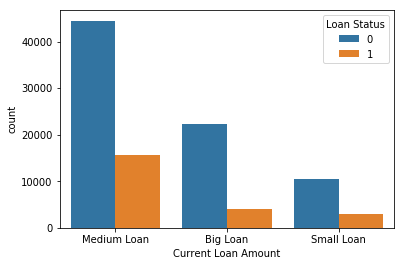

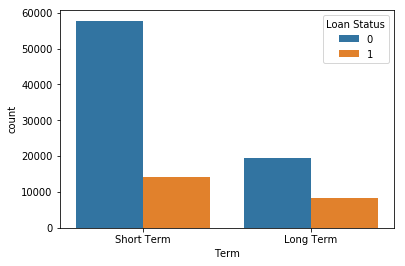

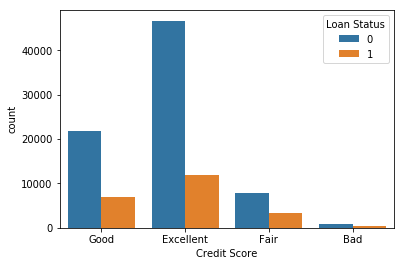

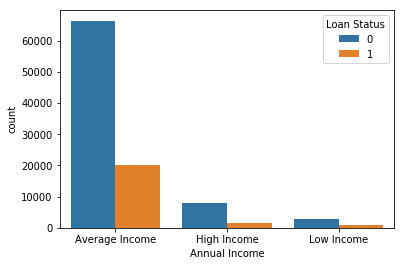

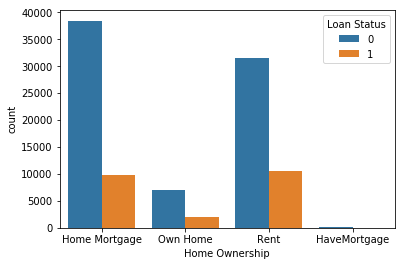

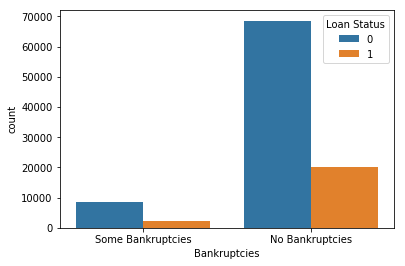

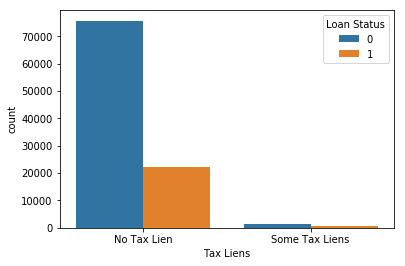

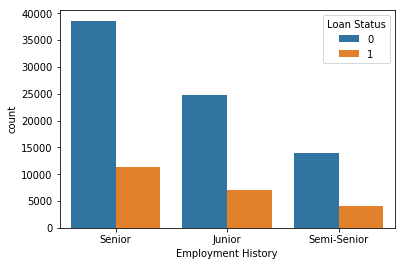

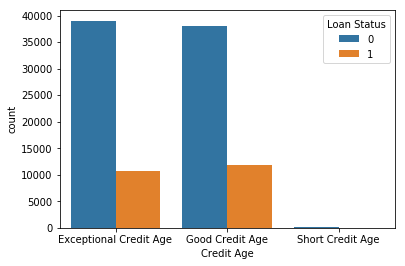

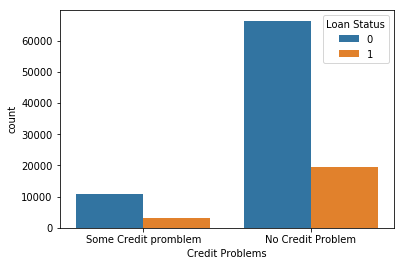

In [38]:
features_list = ['Current Loan Amount','Term','Credit Score','Annual Income','Home Ownership','Bankruptcies','Tax Liens',
                 'Employment History','Credit Age','Credit Problems']
for i in range(len(features_list)):
    ax = sns.countplot(data[features_list[i]], hue=data['Loan Status'])  
    plt.show()

In [39]:
y = data['Loan Status']
x = data.drop(['Loan Status'],axis=1)
x.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Bankruptcies,Tax Liens,Employment History,Credit Age,Credit Problems
0,Medium Loan,Short Term,Good,Average Income,Home Mortgage,Some Bankruptcies,No Tax Lien,Senior,Exceptional Credit Age,Some Credit promblem
1,Medium Loan,Short Term,Excellent,Average Income,Home Mortgage,No Bankruptcies,No Tax Lien,Senior,Exceptional Credit Age,No Credit Problem
2,Big Loan,Short Term,Excellent,High Income,Own Home,No Bankruptcies,No Tax Lien,Senior,Good Credit Age,Some Credit promblem
3,Medium Loan,Long Term,Excellent,Average Income,Own Home,No Bankruptcies,No Tax Lien,Junior,Good Credit Age,No Credit Problem
4,Medium Loan,Short Term,Excellent,Average Income,Rent,No Bankruptcies,No Tax Lien,Semi-Senior,Good Credit Age,No Credit Problem


**Apply One-Hot Encoding**

In [40]:
x = pd.get_dummies(x)
encoded = list(x.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
display(x.head())

28 total features after one-hot encoding.


,Current Loan Amount_Big Loan,Current Loan Amount_Medium Loan,Current Loan Amount_Small Loan,Term_Long Term,Term_Short Term,Credit Score_Bad,Credit Score_Excellent,Credit Score_Fair,Credit Score_Good,Annual Income_Average Income,Annual Income_High Income,Annual Income_Low Income,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Bankruptcies_No Bankruptcies,Bankruptcies_Some Bankruptcies,Tax Liens_No Tax Lien,Tax Liens_Some Tax Liens,Employment History_Junior,Employment History_Semi-Senior,Employment History_Senior,Credit Age_Exceptional Credit Age,Credit Age_Good Credit Age,Credit Age_Short Credit Age,Credit Problems_No Credit Problem,Credit Problems_Some Credit promblem
0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
4,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0


Rename features Labels

In [41]:
x.columns = ['Big Loan', 'Medium Loan', 'Small Loan', 'Long Term', 'Short Term', 'Bad Credit Score', 'Excellent Credit Score',
             'Fair Credit Score', 'Good Credit Score', 'Average Income', 'High Income', 'Low Income', 'HaveMortgage',
             'Home Mortgage', 'Own Home', 'Rent', 'No Bankruptcies', 'Some Bankruptcies', 'No Tax Lien', 'Some Tax Liens',
             'Junior', 'Semi-Senior', 'Senior', 'Exceptional Credit Age', 'Good Credit Age', 'Short Credit Age',
             'No Credit Problem', 'Some Credit promblems']
x.head()

,Big Loan,Medium Loan,Small Loan,Long Term,Short Term,Bad Credit Score,Excellent Credit Score,Fair Credit Score,Good Credit Score,Average Income,High Income,Low Income,HaveMortgage,Home Mortgage,Own Home,Rent,No Bankruptcies,Some Bankruptcies,No Tax Lien,Some Tax Liens,Junior,Semi-Senior,Senior,Exceptional Credit Age,Good Credit Age,Short Credit Age,No Credit Problem,Some Credit promblems
0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
4,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0


### under_sampling
**one of the common technique to handle imbalanced data,
our data is imbalanced**
- 75% of our data set is negative while only 25% is positive.
**What Under_sampling do ?**
- removes some of the majority class to be close or equal miniority class to avoid bias to The majority class
- **I used under_sampling because our dataset is big enough so no big problem with reduce it if this will handle imbalance problem.**

In [42]:
nm = NearMiss(random_state=42)
x_res,y_res = nm.fit_sample(x,y)
x_res.shape,y_res.shape

((45174, 28), (45174,))

**Splitting data**

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=42)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 33880 samples.
Testing set has 11294 samples.


## Benchmark models
- DummyClassifier * DummyClassifier with most_frequent strategy is working same of ZeroR algorithm , I used it because its already implemented in skLearn.

In [44]:
dClassifier = DummyClassifier(strategy='most_frequent')
dClassifier.fit(x_train, y_train)
dPrediction = dClassifier.predict(x_test)
#print("Score: ",dClassifier.score(x_test, y_test)* 100)
print('Accuracy =',accuracy_score(y_test,dPrediction)*100,'F-Beta =',fbeta_score(y_test,dPrediction,beta=.5)*100)

Accuracy = 49.59270409066761 F-Beta = 55.15292356775705


- RandomForest500

In [45]:
rfClassifier = RandomForestClassifier(n_estimators=500,random_state=12)
rfClassifier.fit(x_train, y_train)
rfPrediction = rfClassifier.predict(x_test)
print('Accuracy =',accuracy_score(y_test,rfPrediction)*100,'F-Beta =',fbeta_score(y_test,rfPrediction,beta=.5)*100)

Accuracy = 58.43810873029928 F-Beta = 58.0841539838854


<function matplotlib.pyplot.show(*args, **kw)>

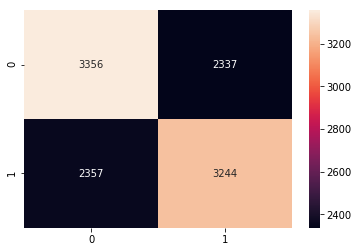

In [46]:
rfc_con = confusion_matrix(y_test, rfPrediction)
sns.heatmap(rfc_con, annot=True, fmt="d")
plt.show
# note that confusion_matrix sort values as follows
# | TN | FP |
# | FN | TP |

# as written in confusion_matrix documentation : 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

## Model Selection
- RandomForest
- KNN
- LogisticRegression

In [47]:
randomForest = RandomForestClassifier(random_state=42)
randomForest.fit(x_train, y_train)
randomForestPrediction = randomForest.predict(x_test)
print('Accuracy =',accuracy_score(y_test,randomForestPrediction)*100,'F-Beta =',fbeta_score(y_test,randomForestPrediction,beta=.5)*100)

Accuracy = 58.30529484682132 F-Beta = 57.8397212543554


In [48]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knnPrediction = knn.predict(x_test)
print('Accuracy =',accuracy_score(y_test,knnPrediction)*100,'F-Beta =',fbeta_score(y_test,knnPrediction,beta=.5)*100)

Accuracy = 55.68443421285638 F-Beta = 54.67076827226354


In [49]:
logisticReg = LogisticRegression(random_state=42)
logisticReg.fit(x_train,y_train)
logisticRegPrediction = logisticReg.predict(x_test)
print('Accuracy =',accuracy_score(y_test,logisticRegPrediction)*100,'F-Beta =',fbeta_score(y_test,logisticRegPrediction,beta=.5)*100)

Accuracy = 57.331326367983 F-Beta = 56.25176860573231


As we see **RandomForest** is the best, So i will go with it to next stage.

<function matplotlib.pyplot.show(*args, **kw)>

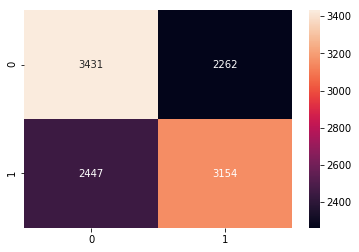

In [50]:
rfc_con = confusion_matrix(y_test, randomForestPrediction)
sns.heatmap(rfc_con, annot=True, fmt="d")
plt.show

## Model Tuning

In [51]:
clf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [200, 600, 1000],\
              'max_depth': [10, 50, 100],\
              'min_samples_split': [2,6]}

grid_obj = GridSearchCV(clf, param_grid=param_grid, cv=3)


grid_fit = grid_obj.fit(x_train, y_train)

print("Best parameter: ", grid_obj.best_params_)

# Get the estimator/ clf
best_clf = grid_fit.best_estimator_

grid_y_pred = best_clf.predict(x_test)

print("Optimal accuracy score on the testing data: {:.2f}".format(accuracy_score(y_test, grid_y_pred)*100))

Best parameter:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 600}
Optimal accuracy score on the testing data: 59.12


In [52]:
fbeta_score(y_test, grid_y_pred,beta=2)*100

59.75557766093505

Our model should be high Recall Model because we want to catch any Loan request will not paid back .. 
so beta value should be > .5 

In [53]:
beta_values = [.5,1,2,3,4,5,6,7,8,9]
for i in range(len(beta_values)):
    print(fbeta_score(y_test, grid_y_pred,beta=beta_values[i])*100)

58.85852258809533
59.303657999118556
59.75557766093505
59.9077520346197
59.97063758389262
60.001783643984666
60.019288263091916
60.03005071504285
60.0371216447744
60.04200903303041


## Final Model

In [54]:
final_randomForest = RandomForestClassifier(max_depth=10,n_estimators=600,min_samples_split=2,random_state=13)
final_randomForest.fit(x_train, y_train)
randomForestPrediction = final_randomForest.predict(x_test)
print('Accuracy =',accuracy_score(y_test,randomForestPrediction)*100,
      'F-Beta =',fbeta_score(y_test,randomForestPrediction,beta=2)*100)

Accuracy = 59.00478129980521 F-Beta = 59.83603648365688


<function matplotlib.pyplot.show(*args, **kw)>

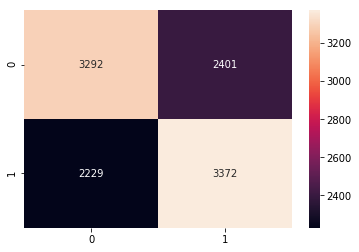

In [56]:
final_randomForest = confusion_matrix(y_test, randomForestPrediction)
sns.heatmap(final_randomForest, annot=True, fmt="d")
plt.show